In [1]:
from conllu import parse

In [6]:
import pandas as pd

def parse_conllu(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = f.read()

    sentences = []
    sentence = []
    
    for line in data.splitlines():
        if line.startswith("#"):  # Baris komentar, abaikan
            continue
        if line == "":  # Kalimat baru
            if sentence:
                sentences.append(sentence)
            sentence = []
        else:
            columns = line.split("\t")
            # Hanya ambil kolom yang relevan, misalnya ID, bentuk kata, POS, lemma
            sentence.append(columns)

    if sentence:
        sentences.append(sentence)

    return sentences

def conllu_to_dataframe(file_path):
    sentences = parse_conllu(file_path)
    # Rata-rata data yang akan dimasukkan ke DataFrame memiliki ID, bentuk kata, lemma, POS, dll
    columns = ['ID', 'Form', 'Lemma', 'UPOS', 'XPOS', 'Feats', 'Head', 'DepRel', 'Deps', 'Misc']
    
    data = []
    for sentence in sentences:
        for token in sentence:
            data.append(token)
    
    df = pd.DataFrame(data, columns=columns)
    return df

# Path ke file .conllu
file_path = 'kumpulan_cerita_bahasa_bali.conllu'

# Membaca file dan memetakan ke pandas DataFrame
df = conllu_to_dataframe(file_path)


In [7]:
df.head()

,ID,Form,Lemma,UPOS,XPOS,Feats,Head,DepRel,Deps,Misc
0,1,Pan,Pan,propn,nnp,_,2,compound,_,b-per
1,2,Karsa,Karsa,propn,nnp,_,6,nsubj,_,i-per
2,3,ajaka,ajak,adp,in,_,4,case,_,_
3,4,pianakne,pianak,noun,nn,Poss=Yes,6,nsubj,_,_
4,5,muani,muani,noun,nn,_,4,compound,_,_


C:\Users\widi arsa\AppData\Local\Temp\ipykernel_9488\1094089050.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deprel_counts.index, y=deprel_counts.values, palette='viridis')


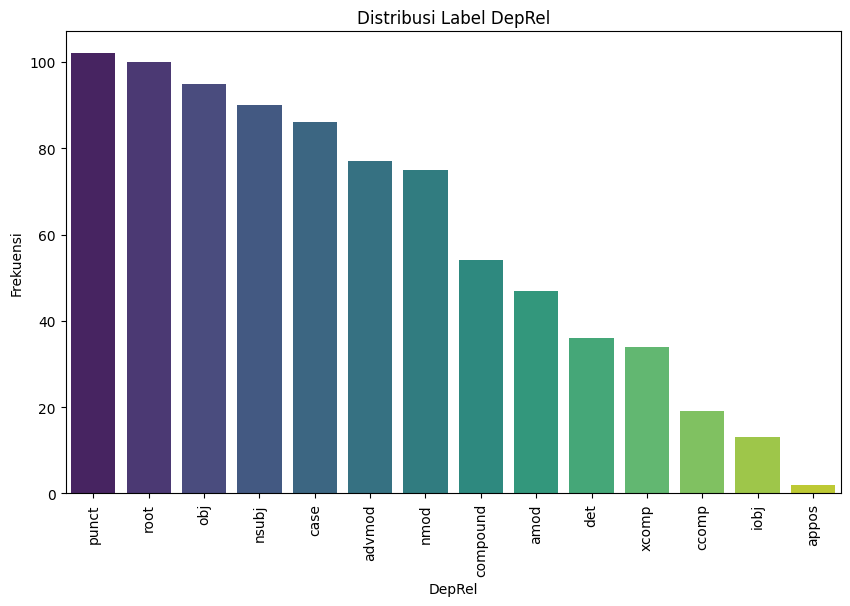

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung frekuensi setiap label DepRel
deprel_counts = df['DepRel'].value_counts()

# Membuat grafik batang
plt.figure(figsize=(10, 6))
sns.barplot(x=deprel_counts.index, y=deprel_counts.values, palette='viridis')
plt.title('Distribusi Label DepRel')
plt.xlabel('DepRel')
plt.ylabel('Frekuensi')
plt.xticks(rotation=90)
plt.show()


C:\Users\widi arsa\AppData\Local\Temp\ipykernel_9488\298832704.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deprel_counts.index, y=deprel_counts.values, palette='viridis')


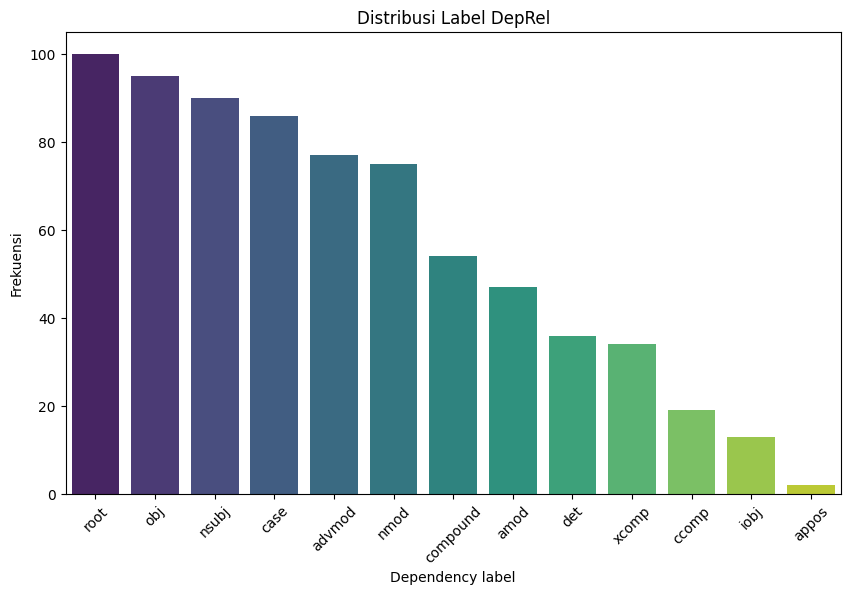

In [13]:
# Menghapus baris dengan label 'punct' dari DataFrame
filtered_df = df[df['DepRel'] != 'punct']

# Menghitung frekuensi setiap label DepRel setelah memfilter 'punct'
deprel_counts = filtered_df['DepRel'].value_counts()

# Membuat grafik batang
plt.figure(figsize=(10, 6))
sns.barplot(x=deprel_counts.index, y=deprel_counts.values, palette='viridis')
plt.title('Distribusi Label DepRel')
plt.xlabel('Dependency label')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()
